In [0]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df = spark.read.csv('/FileStore/tables/Companhia_MB-1.txt', header = True, sep='\t')

df = df.toPandas()

display(df)

N,estado_civil,grau_instrucao,n_filhos,salario,idade_anos,reg_procedencia
1,solteiro,1-ensino fundamental,null,4,26,interior
2,casado,1-ensino fundamental,1,4.56,32,capital
3,casado,1-ensino fundamental,2,5.25,36,capital
4,solteiro,2-ensino medio,null,5.73,20,outra
5,solteiro,1-ensino fundamental,null,6.26,40,outra
6,casado,1-ensino fundamental,0,6.66,28,interior
7,solteiro,1-ensino fundamental,null,6.86,41,interior
8,solteiro,1-ensino fundamental,null,7.39,43,capital
9,casado,2-ensino medio,1,7.59,34,capital
10,solteiro,2-ensino medio,null,7.44,23,outra


In [0]:
df['salario'] = df['salario'].astype(float)

In [0]:
df['idade_anos'] = df['idade_anos'].astype(int)

In [0]:
df['n_filhos'] = df['n_filhos'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   N                36 non-null     object 
 1   estado_civil     36 non-null     object 
 2   grau_instrucao   36 non-null     object 
 3   n_filhos         20 non-null     float64
 4   salario          36 non-null     float64
 5   idade_anos       36 non-null     int64  
 6   reg_procedencia  36 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 2.1+ KB


In [0]:
df = df.drop('N', axis = 1)
df.head()

,estado_civil,grau_instrucao,n_filhos,salario,idade_anos,reg_procedencia
0,solteiro,1-ensino fundamental,NaN,4.00,26,interior
1,casado,1-ensino fundamental,1.0,4.56,32,capital
2,casado,1-ensino fundamental,2.0,5.25,36,capital
3,solteiro,2-ensino medio,NaN,5.73,20,outra
4,solteiro,1-ensino fundamental,NaN,6.26,40,outra


In [0]:
df['n_filhos'] = df['n_filhos'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   estado_civil     36 non-null     object 
 1   grau_instrucao   36 non-null     object 
 2   n_filhos         36 non-null     float64
 3   salario          36 non-null     float64
 4   idade_anos       36 non-null     int64  
 5   reg_procedencia  36 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 1.8+ KB


In [0]:
generos = ['Masculino', 'Feminino']

df['Genero'] = [random.choice(generos) for i in range(len(df))]

df.head()

,estado_civil,grau_instrucao,n_filhos,salario,idade_anos,reg_procedencia,Genero
0,solteiro,1-ensino fundamental,0.0,4.00,26,interior,Masculino
1,casado,1-ensino fundamental,1.0,4.56,32,capital,Feminino
2,casado,1-ensino fundamental,2.0,5.25,36,capital,Feminino
3,solteiro,2-ensino medio,0.0,5.73,20,outra,Masculino
4,solteiro,1-ensino fundamental,0.0,6.26,40,outra,Feminino


In [0]:
df_prod  = df.copy(deep=True)
df_prod.head()

,estado_civil,grau_instrucao,n_filhos,salario,idade_anos,reg_procedencia,Genero
0,solteiro,1-ensino fundamental,0.0,4.00,26,interior,Masculino
1,casado,1-ensino fundamental,1.0,4.56,32,capital,Feminino
2,casado,1-ensino fundamental,2.0,5.25,36,capital,Feminino
3,solteiro,2-ensino medio,0.0,5.73,20,outra,Masculino
4,solteiro,1-ensino fundamental,0.0,6.26,40,outra,Feminino


In [0]:
df_prod.to_csv('Df_Prod.csv')

In [0]:
display(df_prod)

estado_civil,grau_instrucao,n_filhos,salario,idade_anos,reg_procedencia,Genero
solteiro,1-ensino fundamental,0.0,4.0,26,interior,Masculino
casado,1-ensino fundamental,1.0,4.56,32,capital,Feminino
casado,1-ensino fundamental,2.0,5.25,36,capital,Feminino
solteiro,2-ensino medio,0.0,5.73,20,outra,Masculino
solteiro,1-ensino fundamental,0.0,6.26,40,outra,Feminino
casado,1-ensino fundamental,0.0,6.66,28,interior,Masculino
solteiro,1-ensino fundamental,0.0,6.86,41,interior,Masculino
solteiro,1-ensino fundamental,0.0,7.39,43,capital,Masculino
casado,2-ensino medio,1.0,7.59,34,capital,Feminino
solteiro,2-ensino medio,0.0,7.44,23,outra,Masculino


In [0]:
q1 = np.quantile(df_prod['salario'], 0.25)
q3 = np.quantile(df_prod['salario'], 0.75)

condicoes = [(df_prod['salario'] <= q1), 
             (df_prod['salario'] >= q3)]

opcoes = ['Salário baixo', 'Salário alto']

df_prod['Faixa_Salarial'] = np.select(condicoes, opcoes, 'Salário_médio')

In [0]:
print(q1)
print(q3)

display(df_prod)

7.5525
14.059999999999999


estado_civil,grau_instrucao,n_filhos,salario,idade_anos,reg_procedencia,Genero,Faixa_Salarial
solteiro,1-ensino fundamental,0.0,4.0,26,interior,Masculino,Salário baixo
casado,1-ensino fundamental,1.0,4.56,32,capital,Feminino,Salário baixo
casado,1-ensino fundamental,2.0,5.25,36,capital,Feminino,Salário baixo
solteiro,2-ensino medio,0.0,5.73,20,outra,Masculino,Salário baixo
solteiro,1-ensino fundamental,0.0,6.26,40,outra,Feminino,Salário baixo
casado,1-ensino fundamental,0.0,6.66,28,interior,Masculino,Salário baixo
solteiro,1-ensino fundamental,0.0,6.86,41,interior,Masculino,Salário baixo
solteiro,1-ensino fundamental,0.0,7.39,43,capital,Masculino,Salário baixo
casado,2-ensino medio,1.0,7.59,34,capital,Feminino,Salário_médio
solteiro,2-ensino medio,0.0,7.44,23,outra,Masculino,Salário baixo


# Campanha 1 - Sapatos para público feminino

Público femino está mais presente na capital


reg_procedencia,capital,interior,outra
Genero,,,
Feminino,0.47,0.20,0.33
Masculino,0.19,0.43,0.38


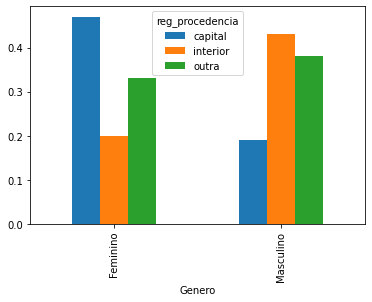

In [0]:
generoXregiao = np.round(pd.crosstab(df_prod['Genero'], df_prod['reg_procedencia'], normalize='index'), 2)
generoXregiao.plot(kind='bar')
generoXregiao

Público femino está mais presente na capital

Faixa_Salarial,Salário alto,Salário baixo,Salário_médio
Genero,,,
Feminino,0.27,0.20,0.53
Masculino,0.24,0.29,0.48


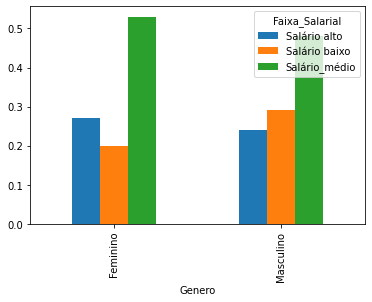

In [0]:
salarioXgenero = np.round(pd.crosstab(df_prod['Genero'], df_prod['Faixa_Salarial'], normalize='index'), 2)
salarioXgenero.plot(kind='bar')
salarioXgenero

Público feminino ganha mais que o público masculino.

<command-2670898659358034>:1: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  a = plt.imread('https://inovag.com.br/wp-content/uploads/2019/05/perfildosusuarios-1024x1024.png')


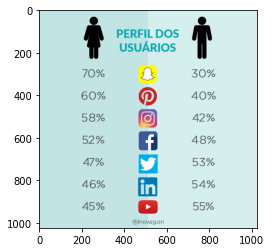

In [0]:
a = plt.imread('https://inovag.com.br/wp-content/uploads/2019/05/perfildosusuarios-1024x1024.png')
plt.imshow(a)
plt.show()

Mulheres utilizam mais instagram e facebook

# Insights:
- Sapatos de grife para público feminino;
- Campanhas direcionada ao público feminino da capital;
- Propaganda via instagram e facebook;
- Publicidade com grandes influencers.

# Campanha 2 - Sapatos público masculino

reg_procedencia,capital,interior,outra
Genero,,,
Feminino,0.47,0.20,0.33
Masculino,0.19,0.43,0.38


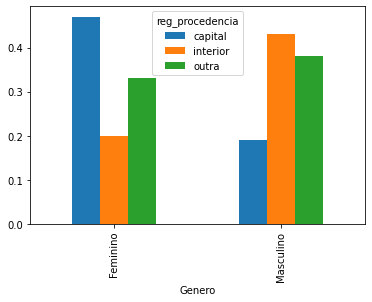

In [0]:
generoXregiao = np.round(pd.crosstab(df_prod['Genero'], df_prod['reg_procedencia'], normalize='index'), 2)
generoXregiao.plot(kind='bar')
generoXregiao

Publico masculino mora fora da capital

Faixa_Salarial,Salário alto,Salário baixo,Salário_médio
Genero,,,
Feminino,0.27,0.20,0.53
Masculino,0.24,0.29,0.48


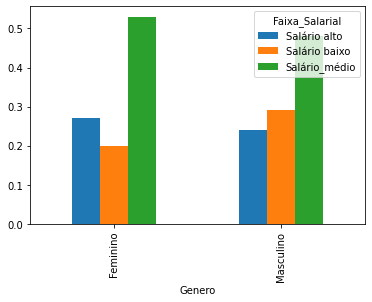

In [0]:
salarioXgenero = np.round(pd.crosstab(df_prod['Genero'], df_prod['Faixa_Salarial'], normalize='index'), 2)
salarioXgenero.plot(kind='bar')
salarioXgenero

Renda masculina é menor que renda feminina.

<command-2670898659358036>:1: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  a = plt.imread('https://inovag.com.br/wp-content/uploads/2019/05/perfildosusuarios-1024x1024.png')


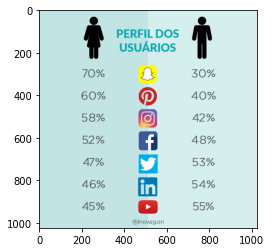

In [0]:
a = plt.imread('https://inovag.com.br/wp-content/uploads/2019/05/perfildosusuarios-1024x1024.png')
plt.imshow(a)
plt.show()

Homens utilizam mais o twitter e youtube

# Insights:
- Maior público é masculino;
- Linha de sapatos downsell;
- Campanha direcionada ao público do interior e outros lugares;
- Propaganda via twitter e youtube.

# Campanha 3 - Campanha em datas comemorativas.

Genero,Feminino,Masculino
estado_civil,,
casado,0.45,0.55
solteiro,0.38,0.62


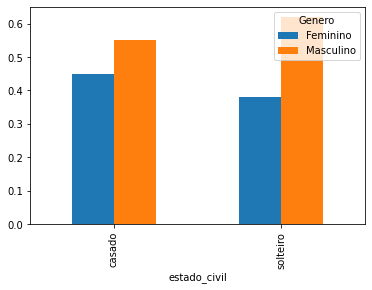

In [0]:
estadocivilXgenero = np.round(pd.crosstab(df_prod['estado_civil'], df_prod['Genero'], normalize='index'), 2)
estadocivilXgenero.plot(kind='bar')
estadocivilXgenero

n_filhos      0.0  1.0  2.0  3.0  5.0
estado_civil                         
casado          4    5    7    3    1
solteiro       16    0    0    0    0

n_filhos      0.0  1.0  2.0  3.0  5.0
estado_civil                         
casado          4    5    7    3    1


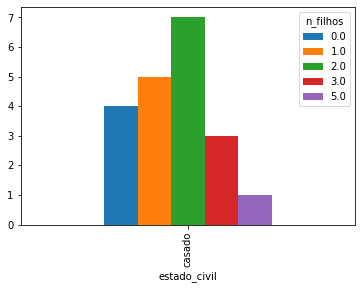

In [0]:
filhoXestado = pd.crosstab(df_prod['estado_civil'], df_prod['n_filhos'])

filhoXcasado = filhoXestado.drop('solteiro', axis = 0)

print(f'{filhoXestado}\n')

print(filhoXcasado)

filhoXcasado.plot(kind='bar');

# Insights:
- Maioria do publico é casado e tem filhos;
- Oportunidade de vendas em datas comemorativas;